In [2]:
!pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3

  Obtaining dependency information for imbalanced-learn==0.12.3 from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("combined_balanced_3000.csv")
print("✅ Data loaded successfully. Shape:", data.shape)

✅ Data loaded successfully. Shape: (3000, 67)


In [6]:
data.rename(columns={
    'Did_Police_Officer_Attend_Scene_of_Accident': 'Did_Police_Officer_Attend',
    'Age_of_Driver': 'age_of_driver',
    'Vehicle_Type': 'vehicle_type',
    'Age_of_Vehicle': 'age_of_vehicle',
    'Engine_Capacity_(CC)': 'engine_cc',
    'Day_of_Week': 'day',
    'Weather_Conditions': 'weather',
    'Road_Surface_Conditions': 'roadsc',
    'Light_Conditions': 'light',
    'Sex_of_Driver': 'gender',
    'Speed_limit': 'speedl'
}, inplace=True)

In [7]:
selected_features = [
    'Did_Police_Officer_Attend',
    'age_of_driver',
    'vehicle_type',
    'age_of_vehicle',
    'engine_cc',
    'day',
    'weather',
    'roadsc',
    'light',
    'gender',
    'speedl'
]

target = 'Accident_Severity'

# check available columns
missing = [f for f in selected_features if f not in data.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

X = data[selected_features]
y = data[target]

print("\nClass distribution before balancing:\n", y.value_counts())


Class distribution before balancing:
 Accident_Severity
2    1542
3    1458
Name: count, dtype: int64


In [8]:
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)

print("\nAfter SMOTE balancing:\n", y_bal.value_counts())


After SMOTE balancing:
 Accident_Severity
3    1542
2    1542
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.pkl")
print("💾 Scaler saved as scaler.pkl")

💾 Scaler saved as scaler.pkl


In [11]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)


✅ Model Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       308

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617


Confusion Matrix:
 [[309   0]
 [  0 308]]


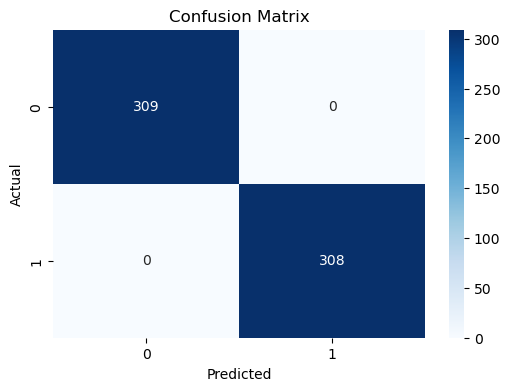

In [18]:
y_pred = model.predict(X_test_scaled)

print("\n✅ Model Accuracy:", round(model.score(X_test_scaled, y_test) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [4]:
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [14]:
joblib.dump(model, "accident_severity_model.sav")
print("💾 Model saved as accident_severity_model.sav")
joblib.dump(model, "accident_severity_model.sav")
print("💾 Model saved as accident_severity_model.sav")

💾 Model saved as accident_severity_model.sav
💾 Model saved as accident_severity_model.sav


In [15]:
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0]
print("\nExample test prediction -> Predicted Severity:", pred)
print("Actual Severity:", y_test.iloc[0])


Example test prediction -> Predicted Severity: 2
Actual Severity: 2


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
